### HackerEarth Deep Learning challenge: Identify the dance form
This International Dance Day, an event management company organized an evening of Indian classical dance performances to celebrate the rich, eloquent, and elegant art of dance. After the event, the company plans to create a microsite to promote and raise awareness among people about these dance forms. However, identifying them from images is a difficult task.

Task is to build a deep learning model that can help the company classify these images into eight categories of Indian classical dance.

##### Note
The eight categories of Indian classical dance are as follows:
 - Manipuri
 - Bharatanatyam
 - Odissi
 - Kathakali
 - Kathak
 - Sattriya
 - Kuchipudi
 - Mohiniyattam
 



In [1]:
# Importing the necessary libraries
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import csv
import torch.optim as optim
import os
from torchvision import models
from torch.utils.data import DataLoader
import torch.nn as nn

In [2]:
# The class "Danceform" is made for the "custom dataset" loading for image classification using CNN.
class DanceForm():
    
    def __init__(self, datapath, labelsfile, transform=None):
        self.datapath=datapath
        self.transform=transform    
        with open(os.path.join(self.datapath,labelsfile)) as f:
            next(f)
            self.labels=[tuple(line) for line in csv.reader(f)]           
        
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self,idx):
        imageName,imageLabel=self.labels[idx]
        imagePath=os.path.join(self.datapath,imageName)
        image=Image.open(imagePath)
        imageLabel=torch.tensor(int(imageLabel))       
        if self.transform:
            image=self.transform(image)           
        return ((image,imageLabel))    
    

In [3]:
#replacing names with respective labels in the csv file 
df=pd.read_csv('danceform/train/train.csv')
Target= {'manipuri': 0,'bharatanatyam': 1,'odissi': 2,'kathakali': 3,'kathak': 4,'sattriya' :5,'kuchipudi':6,'mohiniyattam':7}
df.target = [Target[item] for item in df.target]
df.to_csv(r'danceform/train/traindata.csv',index=False) 
df_new=pd.read_csv('danceform/train/traindata.csv')

### Lenet Model

In [4]:
danceDataset=DanceForm('danceform/train','traindata.csv',transform=transforms.Compose([transforms.Resize([32,32]),transforms.ToTensor()]))

In [5]:
train_set, val_set = torch.utils.data.random_split(danceDataset, [300, 64])

In [6]:
trainLoader = DataLoader(train_set,batch_size=12, shuffle=True)
print(len(trainLoader))
i=1
batch=1
for i, batch in enumerate(trainLoader):
        print(i, batch)
print(i, batch)                

25
0 [tensor([[[[0.0157, 0.0157, 0.0157,  ..., 0.0078, 0.0078, 0.0078],
          [0.0157, 0.0157, 0.0196,  ..., 0.0078, 0.0078, 0.0118],
          [0.0157, 0.0157, 0.0157,  ..., 0.0078, 0.0118, 0.0078],
          ...,
          [0.2392, 0.3686, 0.3882,  ..., 0.0039, 0.0039, 0.0078],
          [0.4941, 0.5451, 0.5255,  ..., 0.0078, 0.0039, 0.0078],
          [0.4196, 0.5137, 0.6157,  ..., 0.0078, 0.0039, 0.0039]],

         [[0.0235, 0.0235, 0.0235,  ..., 0.0157, 0.0157, 0.0157],
          [0.0235, 0.0235, 0.0275,  ..., 0.0157, 0.0157, 0.0196],
          [0.0275, 0.0275, 0.0275,  ..., 0.0157, 0.0196, 0.0157],
          ...,
          [0.2000, 0.2039, 0.1255,  ..., 0.0118, 0.0078, 0.0078],
          [0.1569, 0.0902, 0.0667,  ..., 0.0157, 0.0078, 0.0078],
          [0.0431, 0.0667, 0.1137,  ..., 0.0157, 0.0078, 0.0039]],

         [[0.0196, 0.0196, 0.0196,  ..., 0.0039, 0.0039, 0.0039],
          [0.0196, 0.0196, 0.0235,  ..., 0.0039, 0.0039, 0.0078],
          [0.0235, 0.0235, 0.0235,  

In [7]:
dataiter=iter(trainLoader)
images,labels=next(dataiter)

In [8]:
def imshow(img):
    imgnp=img.numpy()
    plt.imshow(np.transpose(imgnp,(1,2,0)))
    plt.show()

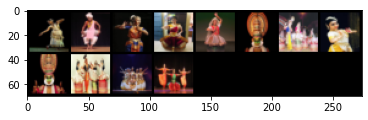

7 0 1 1 0 3 0 7 3 0 7 1


In [9]:
imshow(torchvision.utils.make_grid(images))
print(' '.join(str(labels[j].item())  for j in range(12)))

In [10]:
class FirstCNN(nn.Module):
    def __init__(self):
        super(FirstCNN, self).__init__()
        self.conv1=nn.Conv2d(3,16,3,padding=(1,1),stride=(2,2))
    def forward(self,x):
        x=self.conv1(x)
        return x

In [11]:
net=FirstCNN()
out=net(images)
out.shape

torch.Size([12, 16, 16, 16])

In [12]:
class FirstCNN_v2(nn.Module):
    def __init__(self):
        super(FirstCNN_v2,self).__init__()
        self.model=nn.Sequential(
        nn.Conv2d(3,8,3),
        nn.Conv2d(8,16,3))
        
    def forward(self,x):
        x=self.model(x)
        return x
    

In [13]:
net1=FirstCNN_v2()
out1=net1(images)
out1.shape

torch.Size([12, 16, 28, 28])

In [14]:
class FirstCNN_v3(nn.Module):
    def __init__(self):
        super(FirstCNN_v3,self).__init__()
        self.model=nn.Sequential(
        nn.Conv2d(3,10,5),
        nn.AvgPool2d(2,stride=2),    
        nn.Conv2d(10,16,5),
        nn.AvgPool2d(2,stride=2))
        
    def forward(self,x):
        x=self.model(x)
        return x

In [15]:
net2=FirstCNN_v3()
out2=net2(images)
out2.shape

torch.Size([12, 16, 5, 5])

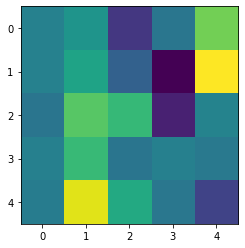

In [16]:
plt.imshow(out2[0,0,:,:].detach().numpy())

In [26]:
class LeNET(nn.Module):
    def __init__(self):
        super(LeNET,self).__init__()
        self.cnnmodel=nn.Sequential(
        nn.Conv2d(3,6,5),          # (N,3,32,32) -> (N,6,28,28)
        nn.ReLU(),    
        nn.AvgPool2d(2,stride=2),  # (N,6,28,28) -> (N,6,14,14)  
        nn.Conv2d(6,16,5),         # (N,6,14,14) -> (N,16,10,10)
        nn.ReLU(),    
        nn.AvgPool2d(2,stride=2))  # (N,16,10,10)-> (N,16,5,5)
        
        self.fc_model=nn.Sequential(
        nn.Linear(400,120),        # (N,400)  -> (N,120)
        nn.ReLU(),
        nn.Linear(120,84),         # (N,120)  -> (N,84)
        nn.ReLU(),
        nn.Linear(84,8)            # (N,84)   -> (N,8) because there are 8 classes
        )
        
    def forward(self,x):      
        x=self.cnnmodel(x)
        x=x.view(x.size(0),-1)
        x=self.fc_model(x)        
        return x

In [27]:
lenet=LeNET()
output=lenet(images)
print(type(output))

<class 'torch.Tensor'>


In [28]:
max_elements,pred_class=torch.max(output.data,1)
print(pred_class)

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


In [29]:
testDataset=DanceForm('/home/komal/danceform/test','test.csv',transform=transforms.Compose([transforms.Resize([32,32]),transforms.ToTensor()]))
testloader = DataLoader(testDataset,batch_size=12, shuffle=False)

In [30]:
def evaluation(dataloader):
    total,correct=0,0
    for data in dataloader:
        inputs,label=data
        outputs=lenet(inputs)
        _,pred=torch.max(outputs.data,1)
        total += label.size(0)
        correct += (pred==labels).sum().item()
        return 100 * correct / total

In [31]:
lenet=LeNET()

In [32]:
loss_fn=nn.CrossEntropyLoss()
opt=optim.SGD(lenet.parameters(), lr=0.001,momentum=0.9)

25.00
0.00
16.67
0.00
16.67
16.67
8.33
8.33
8.33
0.00
16.67
41.67
16.67
0.00
8.33
8.33
33.33
16.67
8.33
33.33
8.33
0.00
25.00
25.00
0.00
16.67
16.67
16.67
0.00
41.67
8.33
33.33
25.00
16.67
16.67
16.67
16.67
8.33
8.33
8.33
16.67
8.33
8.33
8.33
0.00
8.33
16.67
16.67
8.33
25.00
16.67
25.00
16.67
0.00
25.00
16.67
33.33
8.33
0.00
0.00
25.00
8.33
33.33
16.67
8.33
8.33
33.33
0.00
8.33
0.00
8.33
8.33
16.67
8.33
16.67
33.33
8.33
8.33
16.67
16.67
25.00
16.67
8.33
16.67
0.00
0.00
8.33
8.33
8.33
16.67
25.00
8.33
16.67
0.00
25.00
8.33
8.33
16.67
8.33
8.33
8.33
25.00
16.67
25.00
8.33
25.00
16.67
8.33
8.33
25.00
8.33
25.00
33.33
8.33
0.00
25.00
16.67
0.00
16.67
16.67
8.33
8.33
16.67
8.33
16.67
0.00
16.67
8.33
16.67
16.67
16.67
16.67
8.33
0.00
16.67
25.00
16.67
0.00
16.67
16.67
25.00
16.67
8.33
8.33
8.33
25.00
16.67
8.33
8.33
8.33
16.67
16.67
16.67
8.33
8.33
8.33
25.00
16.67
0.00
0.00
16.67
25.00
8.33
8.33
0.00
8.33
8.33
8.33
16.67
16.67
0.00
25.00
25.00
16.67
25.00
25.00
25.00
16.67
8.33
16.67
8.33
1

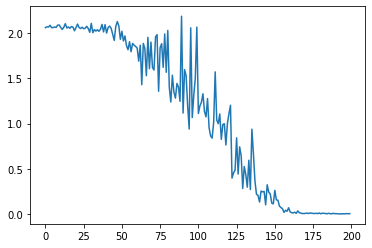

In [33]:
loss_arr=[]
loss_epoch_arr=[]
max_epochs=200

for epoch in range(max_epochs):
    for i,data in enumerate(trainLoader,0):
        inputs,labels=data
        opt.zero_grad()
        outputs=lenet(inputs)
        loss=loss_fn(outputs,labels)
        loss.backward()
        opt.step()
        
        loss_arr.append(loss.item())
        
    loss_epoch_arr.append(loss.item())    
    print('%0.2f'%(evaluation(trainLoader)))
plt.plot(loss_epoch_arr)
plt.show()

### Transfer Learning

In [4]:
danceDataset=DanceForm('danceform/train','traindata.csv',transform=transforms.Compose([transforms.Resize(256),                    #[2]

 transforms.CenterCrop(224),                #[3]

 transforms.ToTensor(),                     #[4]

 transforms.Normalize(                      #[5]

 mean=[0.485, 0.456, 0.406],                #[6]

 std=[0.229, 0.224, 0.225]                  #[7]

 )
]))

In [5]:
train_set, val_set = torch.utils.data.random_split(danceDataset, [300, 64])

In [6]:
train_loader = torch.utils.data.DataLoader(
    train_set,
    batch_size=16,
    shuffle=True,
    num_workers=4
)

test_loader = torch.utils.data.DataLoader(
    val_set,
    batch_size=16,
    shuffle=True,
    num_workers=4
)

In [7]:
for i, batch in enumerate(train_loader):
        print(i, batch)
print(i, batch) 

0 [tensor([[[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          ...,
          [-2.1008, -2.0665, -1.9809,  ...,  2.1462,  2.0434,  2.0434],
          [-2.1008, -2.0665, -1.8953,  ...,  2.1633,  1.9920,  2.0263],
          [-2.0837, -1.9980, -1.8782,  ...,  2.1462,  2.0777,  2.0092]],

         [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          ...,
          [-2.0182, -1.9832, -1.9482,  ...,  0.5553,  0.3452,  0.2927],
          [-2.0182, -1.9832, -1.8606,  ...,  0.5378,  0.2227,  0.1001],
          [-2.0007, -1.9307, -1.8606,  ...,  0.5203,  0.3803,  0.1877]],

         [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
          [-1.8044, -1.8044

### Alexnet 

In [8]:
alexnet = models.alexnet(pretrained=True)
alexnet.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [9]:
dataiter=iter(train_loader)
images,labels=next(dataiter)  

In [10]:
#Updating the third and the last classifier that is the output layer of the network.have 8 output nodes if we are going to get 10 class labels through our model.
alexnet.classifier[6] = nn.Linear(4096,8)

In [11]:
loss_fn=nn.CrossEntropyLoss()
opt=optim.SGD(alexnet.parameters(), lr=0.001,momentum=0.9)

In [12]:
def evaluation(dataloader):
    total,correct=0,0
    for data in dataloader:
        inputs,label=data
        outputs=alexnet(inputs)
        _,pred=torch.max(outputs.data,1)
        total += label.size(0)
        correct += (pred==label).sum().item()
        return 100 * correct / total

81.25
100.00
100.00
100.00
100.00
100.00
100.00
100.00
100.00
100.00
100.00
100.00
100.00
100.00
100.00
100.00
100.00
100.00
100.00
100.00
100.00
100.00
100.00
100.00
100.00
100.00
100.00
100.00
100.00
100.00
100.00
100.00
100.00
100.00
100.00
100.00
100.00
100.00
100.00
100.00
100.00
100.00
100.00
100.00
100.00
100.00
100.00
100.00
100.00
100.00


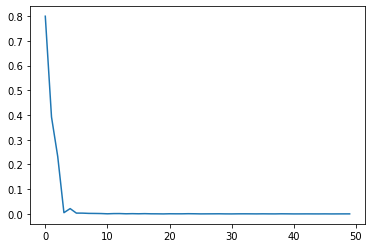

In [14]:
loss_arr=[]
loss_epoch_arr=[]
max_epochs=50

for epoch in range(max_epochs):
    for i,data in enumerate(train_loader,0):
        inputs,labels=data
        opt.zero_grad()
        outputs=alexnet(inputs)
        loss=loss_fn(outputs,labels)
        loss.backward()
        opt.step()
        
        loss_arr.append(loss.item())
        
    loss_epoch_arr.append(loss.item())    
    print('%0.2f'%(evaluation(train_loader)))
plt.plot(loss_epoch_arr)
plt.show()

In [15]:
#Testing Accuracy
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = alexnet(images)
        _, predicted = torch.max(outputs.data, 1)
    
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))

Accuracy of the network on the test images: 70 %


#### VGGnet 

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
print(device)

In [ ]:
use_gpu = torch.cuda.is_available()
if use_gpu:
    print("Using CUDA")

In [16]:
vgg16 = models.vgg16(pretrained=True)
vgg16.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [17]:
vgg16.classifier[6] = nn.Linear(4096,8)

In [18]:
loss_fn=nn.CrossEntropyLoss()
opt=optim.SGD(vgg16.parameters(), lr=0.001,momentum=0.9)

def evaluation(dataloader):
    total,correct=0,0
    for data in dataloader:
        inputs,label=data
        outputs=vgg16(inputs)
        _,pred=torch.max(outputs.data,1)
        total += label.size(0)
        correct += (pred==label).sum().item()
        return 100 * correct / total

87.50
68.75
100.00
100.00
100.00
100.00
100.00
100.00
100.00
100.00
100.00
100.00
100.00
100.00
100.00
100.00
100.00
100.00
100.00
100.00


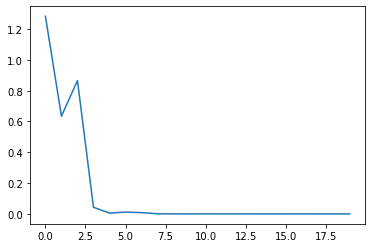

In [19]:
loss_arr=[]
loss_epoch_arr=[]
max_epochs=20

for epoch in range(max_epochs):
    for i,data in enumerate(train_loader,0):
        inputs,labels=data
        opt.zero_grad()
        outputs=vgg16(inputs)
        loss=loss_fn(outputs,labels)
        loss.backward()
        opt.step()
        
        loss_arr.append(loss.item())
        
    loss_epoch_arr.append(loss.item())    
    print('%0.2f'%(evaluation(train_loader)))
plt.plot(loss_epoch_arr)
plt.show()

In [20]:
#Testing Accuracy
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = vgg16(images)
        _, predicted = torch.max(outputs.data, 1)
    
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))

Accuracy of the network on the test images: 79 %
